In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

**Random forest**

In [ ]:
rf =RandomForestClassifier()
x = data.drop(['target'], axis=1)
y = data['target']

rf.fit(x,y)
importances = rf.feature_importances_
feature_importances =pd.Series(importances , index =x.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

thalach     0.136626
oldpeak     0.119959
chol        0.114621
age         0.111812
ca          0.109624
trestbps    0.100768
thal        0.078826
cp          0.070945
exang       0.041609
slope       0.041296
sex         0.028470
restecg     0.027551
fbs         0.017893
dtype: float64


**Feature importance**

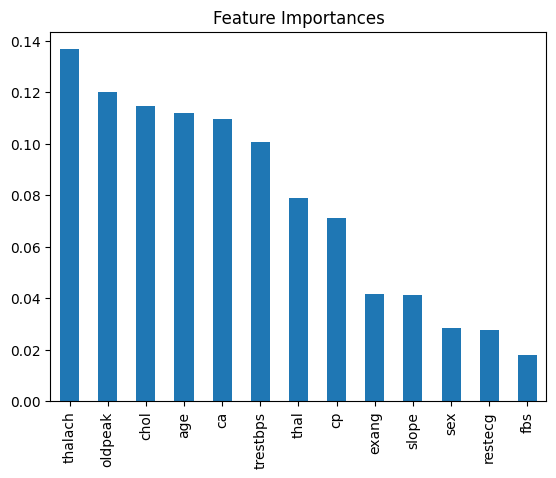

In [ ]:
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

**Feature selection**

In [ ]:
model =RandomForestClassifier(n_estimators=100 , random_state=42 ,class_weight="balanced")
rfe = RFE(estimator=model ,  n_features_to_select=8)
rfe.fit(x,y)
feature_selected = x.columns[rfe.support_]
print(feature_selected)

Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


**Chi-Square**

In [ ]:
categorical_cols = ["cp","sex","restecg","ca","slope","thal"]
x_category = data[categorical_cols]
x_encoded = x_category.apply(LabelEncoder().fit_transform)

chi_scores, p_values = chi2(x_encoded, y)

chi_results =pd.DataFrame({
    'feature': x_category.columns,
    'chi_scores': chi_scores,
    'p_values': p_values
})

print(chi_results)

   feature  chi_scores      p_values
0       cp   23.974139  8.083380e-05
1      sex    7.511646  1.111968e-01
2  restecg   13.026434  1.114735e-02
3       ca  107.213553  2.858376e-22
4    slope   27.066639  1.927165e-05
5     thal   95.027552  1.124331e-19


In [ ]:
important_chai_features =chi_results[chi_results['p_values']<0.05]['feature'].tolist()
print(important_chai_features)

['cp', 'restecg', 'ca', 'slope', 'thal']


**final features**

In [ ]:
final_features =feature_selected.tolist()
print(final_features)

['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
